In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv(r"C:\\Users\\vaccine\Dump.csv",encoding='unicode_escape')
df.head()

c:\users\anves\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (23,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sales_Number,Sales_Item_Number,Plant,Material_Number,Sales_Org,country_desc,country_code,Profit_Center,Product_Planning_Group,requirment_type_n,...,original_promised_pgi_date,lgi_time,shipped_qty,order_qty,last_good_issue_qty,invoiced_qty,item_extended_net_value,ledger_currency_code,document_currency_code,exchange_rate_value
0,161974,9,1,1,12,Germany,DE,1,1,1,...,NaN,2021-04-06 00:00:00,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.17240
1,187545,9,1,1,12,Germany,DE,1,1,1,...,NaN,2021-04-21 00:00:00,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.20865
2,48046,30,1,1,12,Germany,DE,1,1,1,...,NaN,2021-01-19 00:00:00,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.21495
3,105936,30,1,1,12,Germany,DE,1,1,1,...,NaN,2021-02-26 00:00:00,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.21255
4,90487,40,1,1,12,Germany,DE,1,1,1,...,NaN,NaN,NaN,0.0,NaN,0.0,0.0,EUR,EUR,1.21255


In [21]:
df.shape

(6165588, 58)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6165588 entries, 0 to 6165587
Data columns (total 59 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Sales_Number                      int64  
 1   Sales_Item_Number                 int64  
 2   Plant                             int64  
 3   Material_Number                   int64  
 4   Sales_Org                         int64  
 5   country_desc                      object 
 6   country_code                      object 
 7   Profit_Center                     int64  
 8   Product_Planning_Group            int64  
 9   requirment_type_n                 int64  
 10  MRP_type                          int64  
 11  MRP_Group                         int64  
 12  Ledger_ID                         int64  
 13  APRC_Code                         int64  
 14  customer_type2                    object 
 15  customer_type1                    object 
 16  Customer_Group                    in

In [27]:
# New Attribute : Frequency

rfm_f = df.groupby('Customer_Group')['Sales_Number'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Customer_Group', 'Frequency']
rfm_f.head()

,Customer_Group,Frequency
0,1,1541847
1,2,6
2,3,23
3,4,2
4,5,5


In [39]:
import datetime as dt
df['so_item_created_on'] = pd.to_datetime(df['so_item_created_on'],format='%Y-%m-%d')
max_date = max(df['so_item_created_on'])
max_date

Timestamp('2022-09-20 00:00:00')

In [40]:
df['Diff'] = max_date - df['so_item_created_on']
df.head()

,Sales_Number,Sales_Item_Number,Plant,Material_Number,Sales_Org,country_desc,country_code,Profit_Center,Product_Planning_Group,requirment_type_n,...,shipped_qty,order_qty,last_good_issue_qty,invoiced_qty,item_extended_net_value,ledger_currency_code,document_currency_code,exchange_rate_value,Amount,Diff
0,161974,9,1,1,12,Germany,DE,1,1,1,...,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.17240,0.0,546 days
1,187545,9,1,1,12,Germany,DE,1,1,1,...,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.20865,0.0,525 days
2,48046,30,1,1,12,Germany,DE,1,1,1,...,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.21495,0.0,616 days
3,105936,30,1,1,12,Germany,DE,1,1,1,...,0.0,0.0,0.0,0.0,0.0,EUR,EUR,1.21255,0.0,581 days
4,90487,40,1,1,12,Germany,DE,1,1,1,...,NaN,0.0,NaN,0.0,0.0,EUR,EUR,1.21255,0.0,588 days


In [41]:
rfm_p = df.groupby('Customer_Group')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,Customer_Group,Diff
0,1,0 days
1,2,89 days
2,3,68 days
3,4,253 days
4,5,105 days


In [42]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,Customer_Group,Diff
0,1,0
1,2,89
2,3,68
3,4,253
4,5,105


In [49]:
rfm = pd.merge(rfm_f, rfm_p, on='Customer_Group', how='inner')
rfm.columns = ['Customer_Group','Frequency', 'Recency']
rfm.head()

,Customer_Group,Frequency,Recency
0,1,1541847,0
1,2,6,89
2,3,23,68
3,4,2,253
4,5,5,105


Text(0.5, 0, 'Attributes')

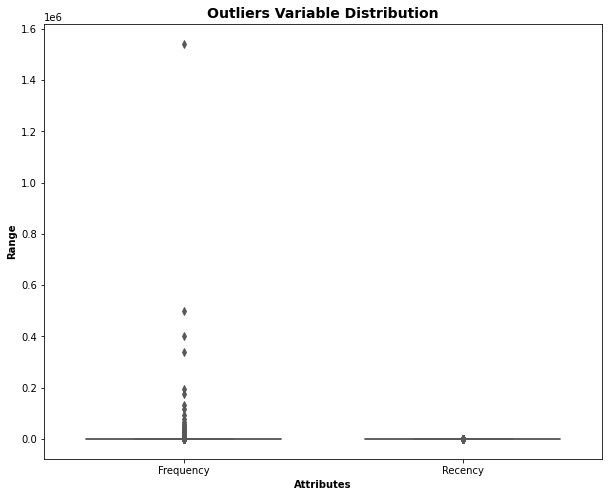

In [50]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [51]:


# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [53]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [54]:
# Rescaling the attributes

rfm_df = rfm[[ 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(9805, 2)

In [56]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Frequency', 'Recency']
rfm_df_scaled.head()

,Frequency,Recency
0,-0.324220,-0.353813
1,-0.257042,-0.498427
2,-0.340027,0.775552
3,-0.328172,-0.243631
4,0.798050,-0.939154


In [57]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [58]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 0])

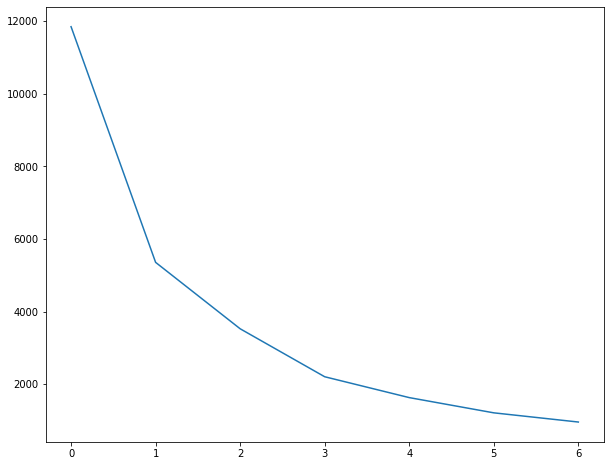

In [69]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(ssd)

In [60]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7044473049049683
For n_clusters=3, the silhouette score is 0.5803787521648198
For n_clusters=4, the silhouette score is 0.5306438974684938
For n_clusters=5, the silhouette score is 0.5595946310505576
For n_clusters=6, the silhouette score is 0.5320143918064502
For n_clusters=7, the silhouette score is 0.5479940373251242
For n_clusters=8, the silhouette score is 0.5472444233622489


In [61]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [62]:
 kmeans.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [63]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Customer_Group,Frequency,Recency,Cluster_Id
1,2,6,89,1
2,3,23,68,1
3,4,2,253,0
4,5,5,105,1
6,7,290,4,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

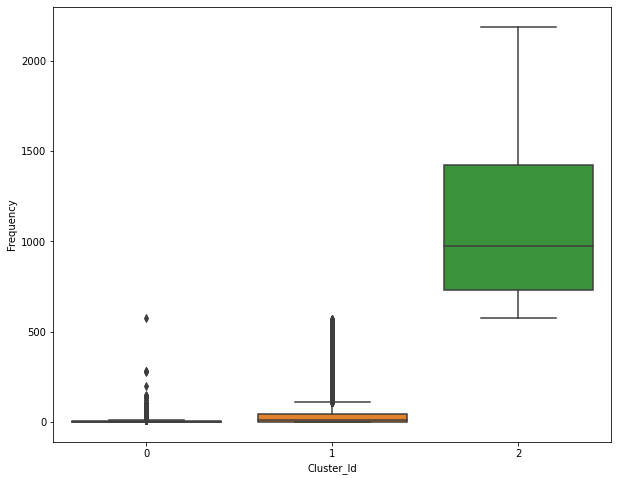

In [65]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

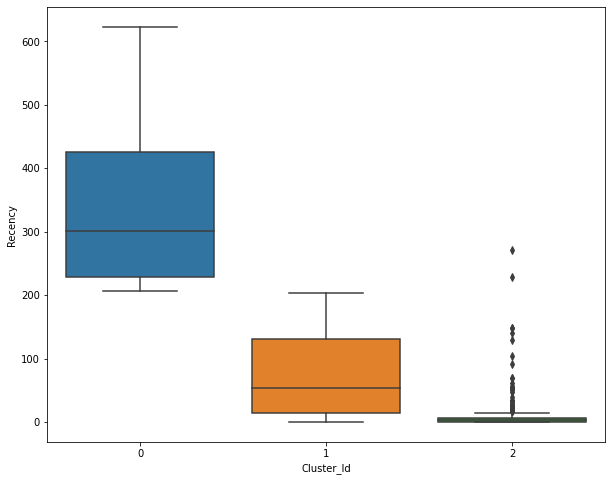

In [66]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

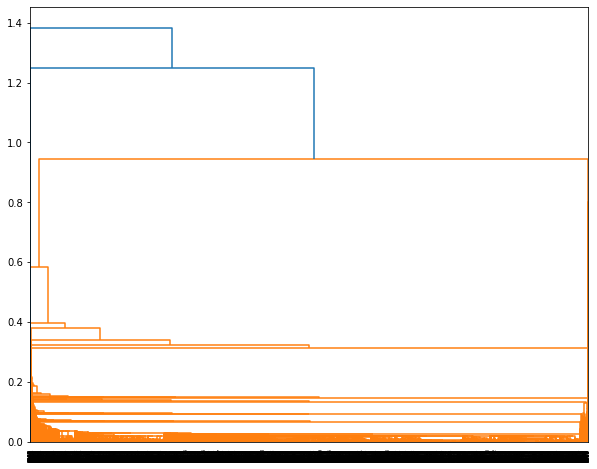

In [70]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

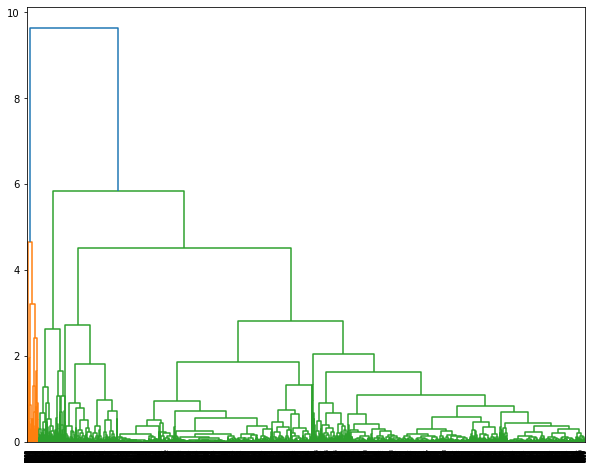

In [71]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [72]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,Customer_Group,Frequency,Recency,Cluster_Id,Cluster_Labels
1,2,6,89,1,0
2,3,23,68,1,0
3,4,2,253,0,0
4,5,5,105,1,0
6,7,290,4,1,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

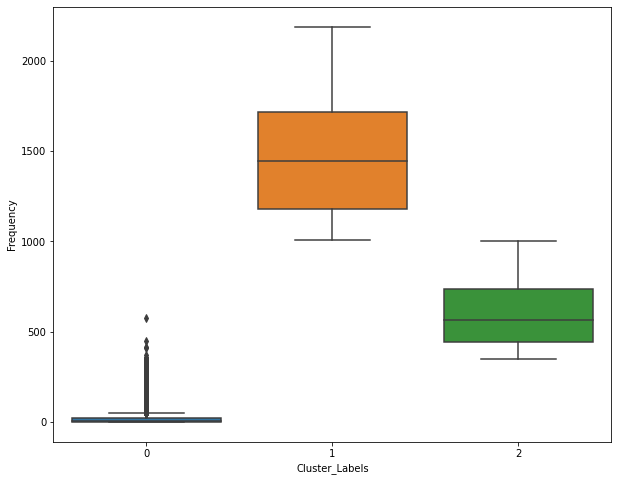

In [75]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

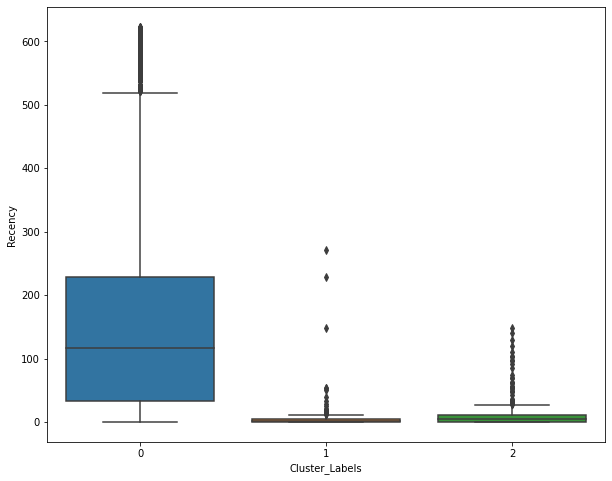

In [76]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

In [77]:
print(rfm)

       Customer_Group  Frequency  Recency  Cluster_Id  Cluster_Labels
1                   2          6       89           1               0
2                   3         23       68           1               0
3                   4          2      253           0               0
4                   5          5      105           1               0
6                   7        290        4           1               0
...               ...        ...      ...         ...             ...
10036           10037         24       82           1               0
10038           10039       1669       20           2               1
10039           10040          8      116           1               0
10040           10041         15      116           1               0
10041           10042          1       26           1               0

[9805 rows x 5 columns]
